## Final Project Submission

Please fill out:
* Student name: Vinayak Modgil
* Student pace: self paced / part time / full time : full time
* Scheduled project review date/time: TBD
* Instructor name: James Irving
* Blog post URL:


## Table of Contents
- **[INTRODUCTION](#INTRODUCTION)<br>**
- **[OBTAIN](#OBTAIN)<br>**
- **[SCRUB](#SCRUB)<br>**
- **[Explore](#Explore)<br>**
- **[Modeling](#Modeling)<br>**
- **[Interpret](#Interpret)<br>**

## INTRODUCTION

### Business Problem
**Potential high earning homeowners in King County are looking to purchase homes which are expensive and fancy. You are acquitted with the dataset to find and recommend houses to them.**

## OBTAIN

### Importing Libraries

In [1]:
# Your code here - remember to use markdown cells for comments as well!
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

import scipy.stats as stats
plt.style.use("seaborn")

### Importing Dataset

In [2]:
df = pd.read_csv("data/kc_house_data.csv")
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


## SCRUB

### Data Cleaning

In [3]:
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

**Using simple imputer from sklearn helps combating null values and we can transform the null values to the most frequent values because of the nature of the independent variables.**

In [4]:
from sklearn.impute import SimpleImputer
## Use imputer variable to clean features
imputer = SimpleImputer(missing_values = np.NaN, strategy="most_frequent")

In [5]:
df["yr_renovated"] = imputer.fit_transform(df["yr_renovated"].values.reshape(-1, 1))[:, 0]
df["yr_renovated"].value_counts()

0.0       20853
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [6]:
df["view"] = imputer.fit_transform(df["view"].values.reshape(-1, 1))[:, 0]
df["view"].value_counts()

0.0    19485
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [7]:
df["waterfront"] = imputer.fit_transform(df["waterfront"].values.reshape(-1, 1))[:, 0]
df["waterfront"].value_counts()

0.0    21451
1.0      146
Name: waterfront, dtype: int64

In [8]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [9]:
df["sqft_basement"] = df["sqft_basement"].map(lambda x: x.replace("?", "0.0"))

### Feature Engineering

**Here we have engineered some features to help find the suitable independent variables which can influence our dependent variable.**

In [10]:
df["large_home"] = df["bedrooms"] > 5
df["large_home"].value_counts()

False    21263
True       334
Name: large_home, dtype: int64

In [11]:
latlong = df[["lat", "long"]]
latlong

,lat,long
0,47.5112,-122.257
1,47.7210,-122.319
2,47.7379,-122.233
3,47.5208,-122.393
4,47.6168,-122.045
...,...,...
21592,47.6993,-122.346
21593,47.5107,-122.362
21594,47.5944,-122.299
21595,47.5345,-122.069


In [12]:
df["how_old"] = abs(df["yr_built"] - 2015)
df["how_old"].value_counts()

1      559
9      453
10     450
11     433
12     420
      ... 
82      30
114     29
113     27
80      24
81      21
Name: how_old, Length: 116, dtype: int64

In [13]:
df["renovated"] = df["yr_renovated"] != 0
df["renovated"].value_counts()

False    20853
True       744
Name: renovated, dtype: int64

In [14]:
df["has_basement"] = df["sqft_basement"] != 0.0
df["has_basement"].value_counts()

True    21597
Name: has_basement, dtype: int64

In [15]:
df["sqft_living_comparison"] = df["sqft_living"] > df["sqft_living15"]

**Converting all the values to either float or int for ease of modeling**

In [16]:
df["sqft_basement"] = df["sqft_basement"].astype("float64")
df["view"] = df["view"].astype("int64")
df["floors"] = df["floors"].astype("int64")
df["waterfront"] = df["waterfront"].astype("int64")
df["renovated"] = df["renovated"].astype("int64")
df["large_home"] = df["large_home"].astype("int64")
df["sqft_living_comparison"] = df["sqft_living_comparison"].astype("int64")

In [17]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,large_home,how_old,renovated,has_basement,sqft_living_comparison
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1,0,0,...,98178,47.5112,-122.257,1340,5650,0,60,0,True,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2,0,0,...,98125,47.7210,-122.319,1690,7639,0,64,1,True,1
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1,0,0,...,98028,47.7379,-122.233,2720,8062,0,82,0,True,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1,0,0,...,98136,47.5208,-122.393,1360,5000,0,50,0,True,1
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1,0,0,...,98074,47.6168,-122.045,1800,7503,0,28,0,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3,0,0,...,98103,47.6993,-122.346,1530,1509,0,6,0,True,0
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2,0,0,...,98146,47.5107,-122.362,1830,7200,0,1,0,True,1
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2,0,0,...,98144,47.5944,-122.299,1020,2007,0,6,0,True,0
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2,0,0,...,98027,47.5345,-122.069,1410,1287,0,11,0,True,1


### Plotting relationships between dependent and independent variable

**Here we have created a function that will plot all of the values of the independent function which will help us differentiate between numerical and categorical variable.**

In [18]:
def histogram(column):
    '''
    returns histogram of a column
    in the dataframe df
    '''
    hist = df[column].hist()
    return plt.show()

def reg(column, df = df):
    return sns.regplot(x=column, y="price", data=df)

#### Bedroom

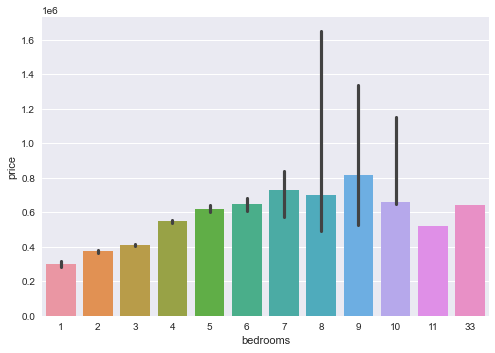

In [19]:
sns.barplot(data=df, x="bedrooms", y="price", ci=95, estimator=np.median)
plt.show()

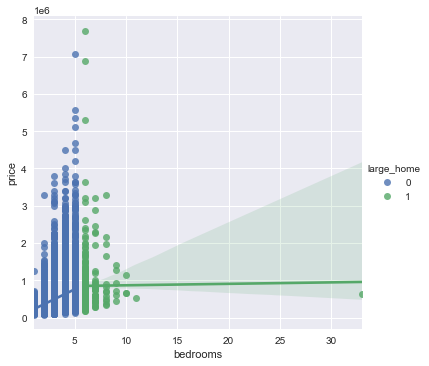

In [20]:
sns.lmplot(x="bedrooms", y="price", hue="large_home", data=df)
plt.show()

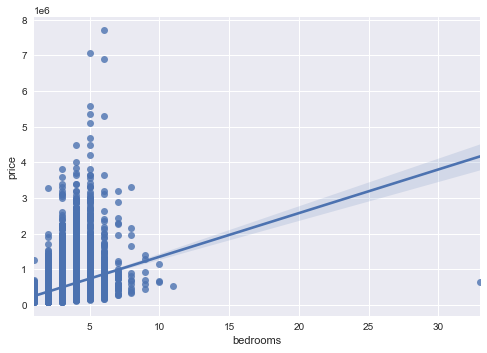

In [21]:
reg("bedrooms", df)
plt.show()

**The function find_outliers help remove the outliers from the single feature and further clarifies the use of the feature in the modeling section.**

In [22]:
def find_outliers(data):
    """
     Detects outliers using the 1.5*IQR thresholds.
    Returns a boolean Series where True=outlier
    
    """ 
    stats = data.describe()
    q1 = stats["25%"]
    q3 = stats["75%"]
    thresh = 1.5*(q3 - q1)
    idx_outliers = (data < (q1-thresh)) | (data > (q3+thresh))
    return idx_outliers

outliers_bedrooms = find_outliers(df["bedrooms"])

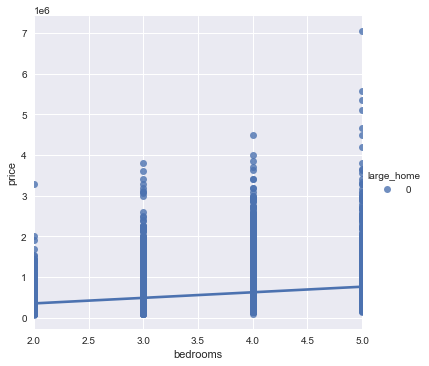

In [23]:
sns.lmplot(x="bedrooms", y="price", hue="large_home", data=df[~outliers_bedrooms])
plt.show()

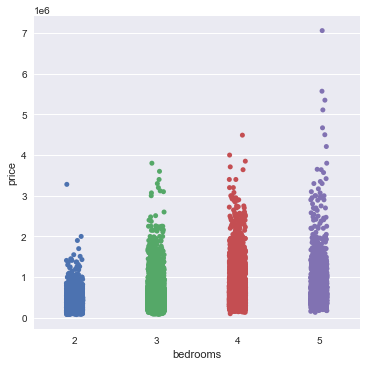

In [24]:
sns.catplot(data=df[~outliers_bedrooms], x="bedrooms", y="price")
plt.show()

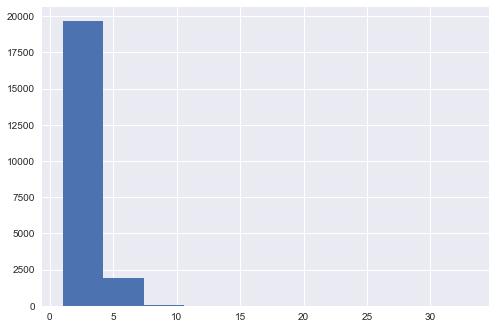

In [25]:
histogram("bedrooms")

#### Bathroom

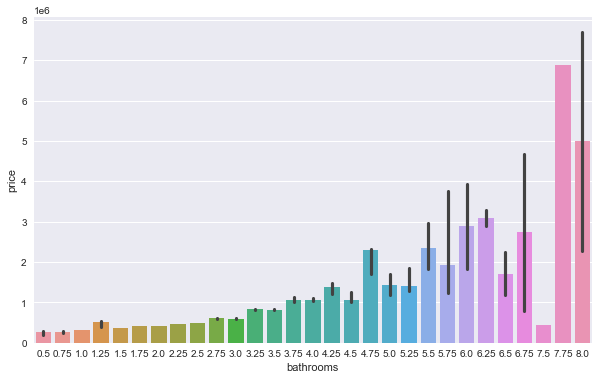

In [26]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x="bathrooms", y="price", data=df, ci=68, estimator=np.median, ax=ax)
plt.show()

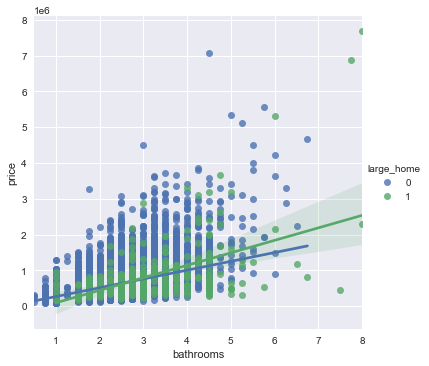

In [27]:
sns.lmplot(x="bathrooms", y="price", data=df, hue="large_home")
plt.show()

In [28]:
outliers_bathroom = find_outliers(df["bathrooms"])
outliers_bathroom.value_counts()

False    21036
True       561
Name: bathrooms, dtype: int64

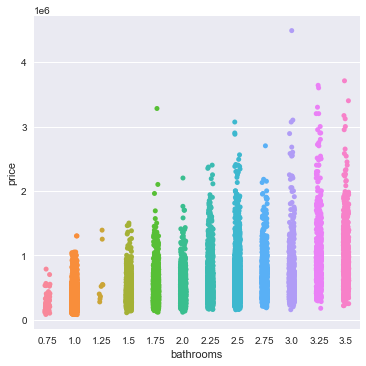

In [29]:
sns.catplot(data=df[~outliers_bathroom], x="bathrooms", y="price")

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

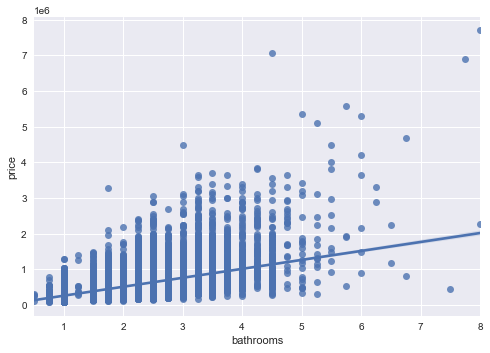

In [30]:
reg("bathrooms")

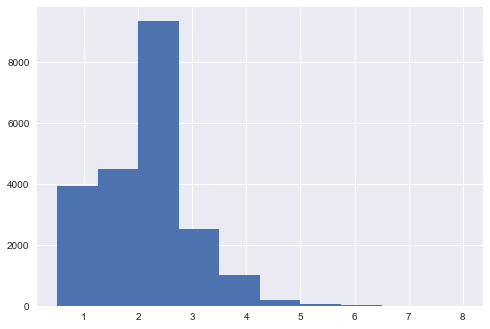

In [31]:
histogram("bathrooms")

#### SQFT - living

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

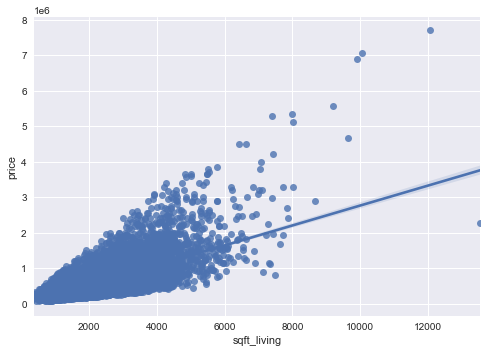

In [32]:
reg("sqft_living")

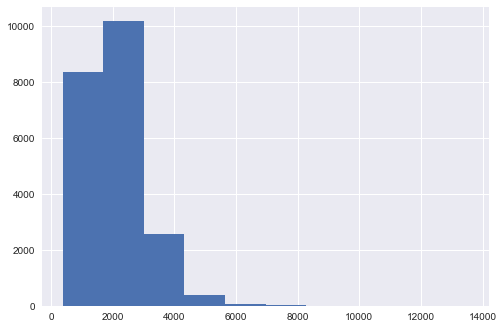

In [33]:
histogram("sqft_living")

#### SQFT-lot

In [34]:
def thousands(x, pos):
    return "{:1.1f}K".format(x* 1e-3)

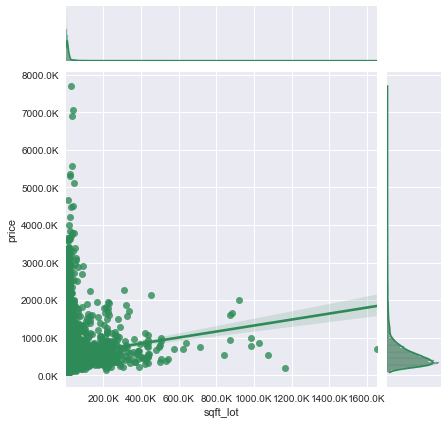

In [35]:
fig3 = sns.jointplot(x="sqft_lot", y="price", data=df, kind="reg", color="seagreen")
fig3.ax_joint.yaxis.set_major_formatter(FuncFormatter(thousands))
fig3.ax_joint.xaxis.set_major_formatter(FuncFormatter(thousands))

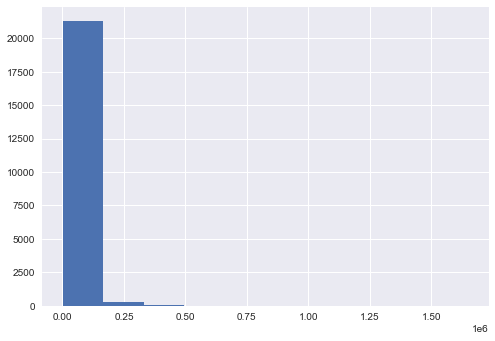

In [36]:
histogram("sqft_lot")

#### Floors

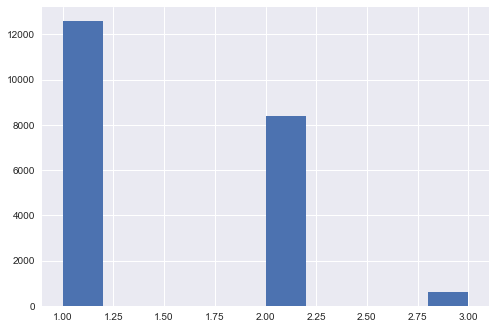

In [37]:
histogram("floors")

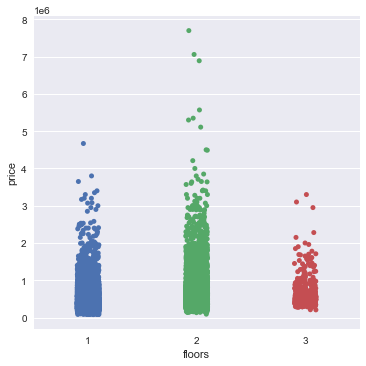

In [38]:
sns.catplot(x="floors", y="price", data=df)

#### Waterfront

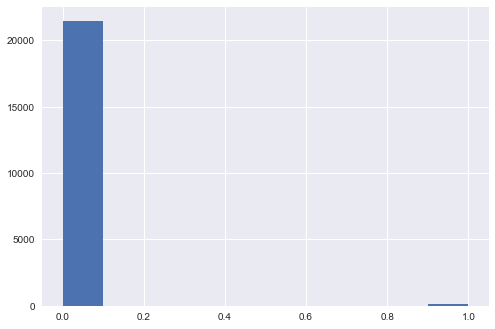

In [39]:
histogram("waterfront")

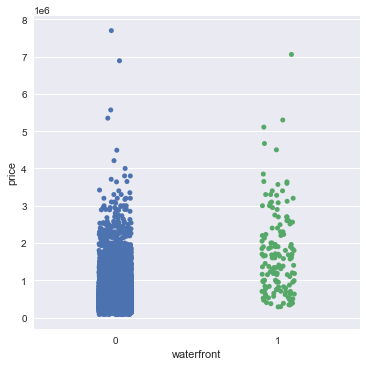

In [40]:
sns.catplot(x="waterfront", y="price", data=df)

]#### Grade

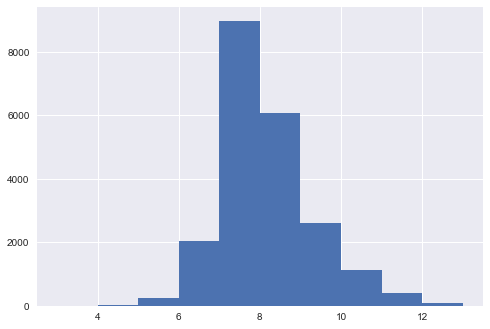

In [41]:
histogram("grade")

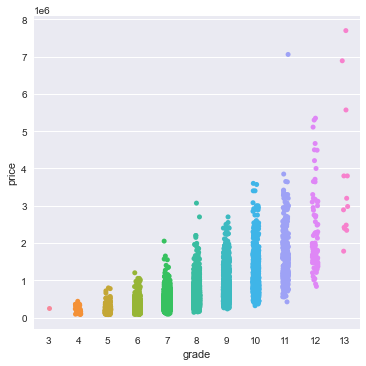

In [42]:
sns.catplot(x="grade", y="price", data=df)

<AxesSubplot:xlabel='grade', ylabel='price'>

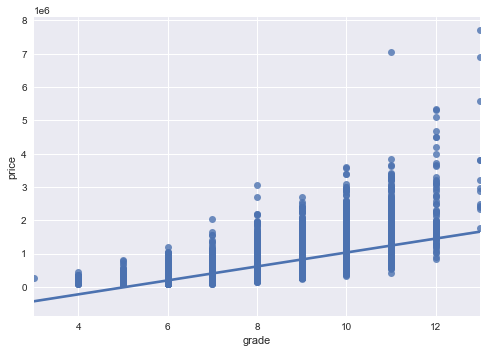

In [43]:
reg("grade")

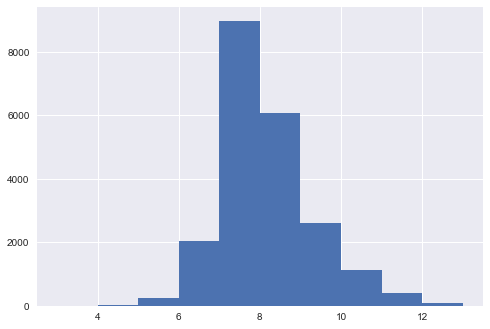

In [44]:
histogram("grade")

#### View

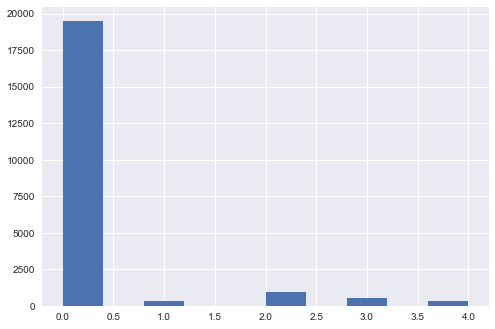

In [45]:
histogram("view")

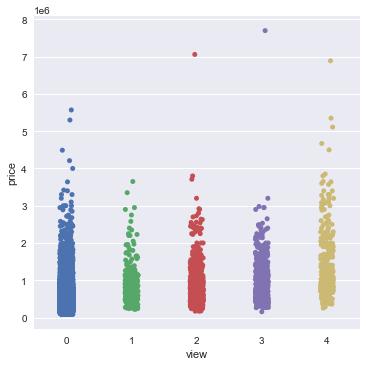

In [46]:
sns.catplot(x="view", y="price", data=df)

<AxesSubplot:xlabel='view', ylabel='price'>

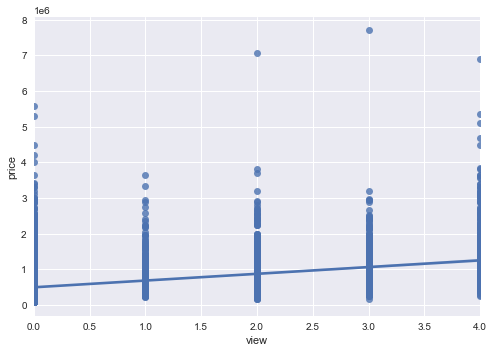

In [47]:
reg("view")

#### SQFT above

<AxesSubplot:xlabel='sqft_above', ylabel='price'>

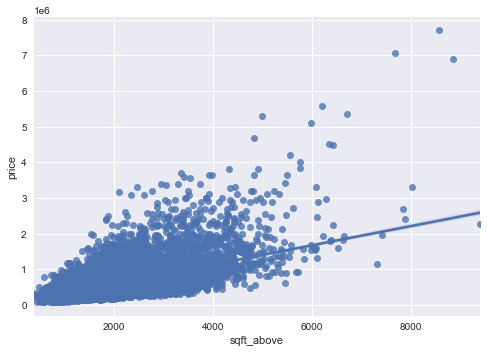

In [48]:
reg("sqft_above")

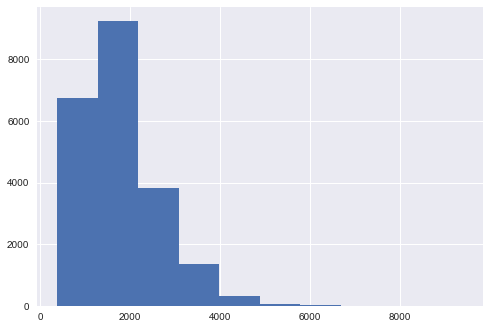

In [49]:
histogram("sqft_above")

#### SQFT-living15

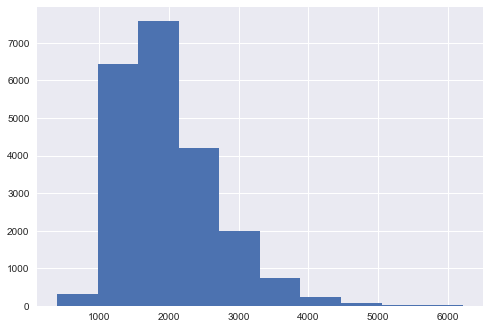

In [50]:
histogram("sqft_living15")

<AxesSubplot:xlabel='sqft_living15', ylabel='price'>

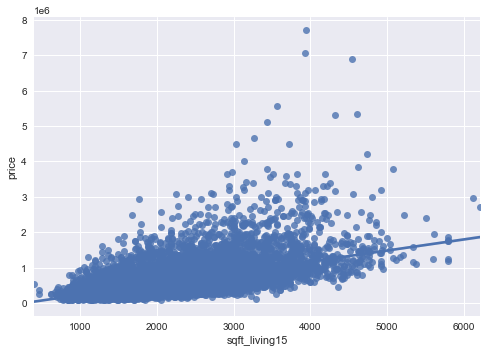

In [51]:
reg("sqft_living15")

#### SQFT_lot15

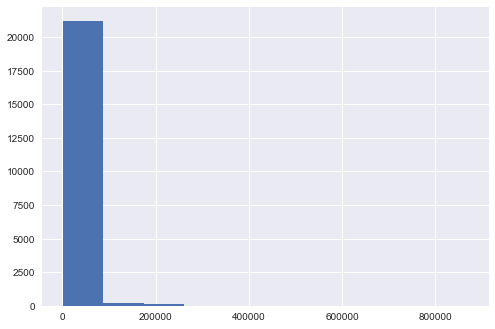

In [52]:
histogram("sqft_lot15")

<AxesSubplot:xlabel='sqft_lot15', ylabel='price'>

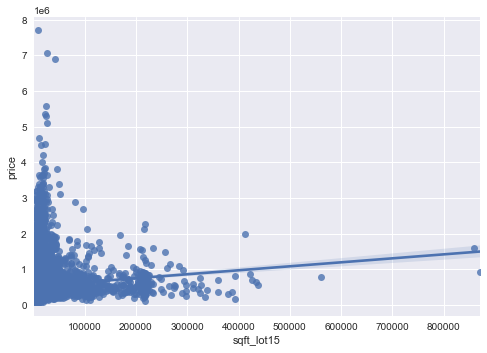

In [53]:
reg("sqft_lot15")

#### SQFT_basement

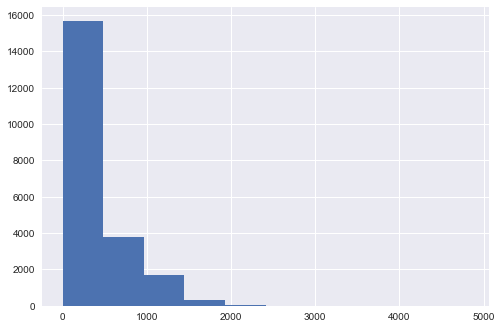

In [54]:
histogram("sqft_basement")

<AxesSubplot:xlabel='sqft_basement', ylabel='price'>

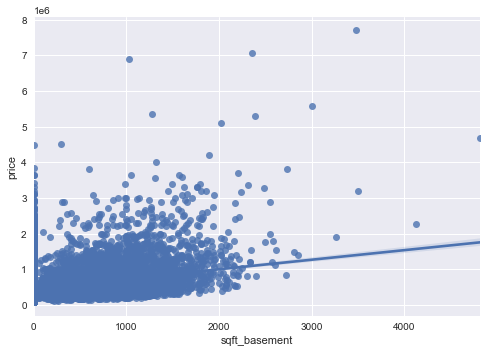

In [55]:
reg("sqft_basement")

### Shifting dependent variable to the end

In [56]:
def move_price_col(df):
    '''
    takes the dataframe as a parameter
    -------------------
    returns the updated dataframe with
    dependent variable in the end
    '''
    # store values of all the columns in cols
    cols = list(df.columns.values)
    
    # pop the price index from cols
    cols.pop(cols.index("price"))
    
    # add the price column to the dataframe df
    df = df[cols + ["price"]]
    return df

df = move_price_col(df)
df

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,lat,long,sqft_living15,sqft_lot15,large_home,how_old,renovated,has_basement,sqft_living_comparison,price
0,7129300520,10/13/2014,3,1.00,1180,5650,1,0,0,3,...,47.5112,-122.257,1340,5650,0,60,0,True,0,221900.0
1,6414100192,12/9/2014,3,2.25,2570,7242,2,0,0,3,...,47.7210,-122.319,1690,7639,0,64,1,True,1,538000.0
2,5631500400,2/25/2015,2,1.00,770,10000,1,0,0,3,...,47.7379,-122.233,2720,8062,0,82,0,True,0,180000.0
3,2487200875,12/9/2014,4,3.00,1960,5000,1,0,0,5,...,47.5208,-122.393,1360,5000,0,50,0,True,1,604000.0
4,1954400510,2/18/2015,3,2.00,1680,8080,1,0,0,3,...,47.6168,-122.045,1800,7503,0,28,0,True,0,510000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,3,2.50,1530,1131,3,0,0,3,...,47.6993,-122.346,1530,1509,0,6,0,True,0,360000.0
21593,6600060120,2/23/2015,4,2.50,2310,5813,2,0,0,3,...,47.5107,-122.362,1830,7200,0,1,0,True,1,400000.0
21594,1523300141,6/23/2014,2,0.75,1020,1350,2,0,0,3,...,47.5944,-122.299,1020,2007,0,6,0,True,0,402101.0
21595,291310100,1/16/2015,3,2.50,1600,2388,2,0,0,3,...,47.5345,-122.069,1410,1287,0,11,0,True,1,400000.0


## Explore

In [57]:
df["bedrooms"].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [58]:
df["view"].value_counts()

0    19485
2      957
3      508
1      330
4      317
Name: view, dtype: int64

In [59]:
df["floors"].value_counts()

1    12583
2     8396
3      618
Name: floors, dtype: int64

In [60]:
df["condition"].value_counts()

3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

In [61]:
categorical = ["zipcode"]

#### Taking care of numeric data

In [62]:
def standardize(feature):
    '''
    takes a feature in the df as the parameter
    ------------------------------------
    returns the standardized value of the feature
    '''
    return (feature - feature.mean()) / feature.std()

In [63]:
#df_stdized = df[numeric].apply(standardize)
#df_stdized

#### Taking care of categorical data

In [64]:
df[categorical]

,zipcode
0,98178
1,98125
2,98028
3,98136
4,98074
...,...
21592,98103
21593,98146
21594,98144
21595,98027


In [65]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False, drop="first")
arr = ohe.fit_transform(df[categorical])
cat_df = pd.DataFrame(arr, columns= ohe.get_feature_names(categorical))
cat_df

,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21593,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21594,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
modeling_df = pd.concat([df.drop(categorical, axis=1), cat_df], axis=1)

In [67]:
modeling_df.to_csv("kc_cleaned.csv", index=False)

#### Initial Model before Multicollinearity check

**Here is a function that will help us model all the feature variables which will further help us tweak the dataframe so that we can work with the right features having p values less than 0.05**

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     203.4
Date:                Wed, 21 Jul 2021   Prob (F-statistic):               0.00
Time:                        14:09:57   Log-Likelihood:            -2.8913e+05
No. Observations:               21597   AIC:                         5.792e+05
Df Residuals:                   21136   BIC:                         5.829e+05
Df Model:                         460                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                -29.3410     21.063     -1.393      0.164     -70.626      11.944
date[T.1/12/2015]       4.117e+04   1.61e+05      0.255      0.799   -2.75e+05    3.58e+05
date[T.1/13/2015]       4.823e+04   1.61e+05      0.299      0.765   -2.68e+05    3.65e+05
date[T.1/14/2015]       1.666e+04   1.61e+05      0.103      0.918   -2.99e+05    3.33e+05
date[T.1/15/2015]       2.533e+04   1.61e+05      0.157      0.875   -2.91e+05    3.42e+05
date[T.1/16/2015]      -8643.3129   1.61e+05     -0.054      0.957   -3.24e+05    3.07e+05
date[T.1/17/2015]       9.888e+04   2.26e+05      0.438      0.661   -3.44e+05    5.41e+05
date[T.1/19/2015]      -4.037e+04   1.69e+05     -0.238      0.812   -3.72e+05    2.92e+05
date[T.1/2/2015]        5.386e+04   1.61e+05      0.334      0.739   -2.62e+05     3.7e+05
date[T.1/20/2015]       5.398e+04   1.61e+05      0.335      0.738   -2.62e+05     3.7e+05
date[T.1/21/2015]       4.924e+04   1.61e+05      0.306      0.760   -2.66e+05    3.65e+05
date[T.1/22/2015]       2.811e+04   1.61e+05      0.174      0.862   -2.88e+05    3.44e+05
date[T.1/23/2015]       1.835e+04   1.61e+05      0.114      0.909   -2.98e+05    3.34e+05
date[T.1/24/2015]      -1.405e+05   1.78e+05     -0.787      0.431    -4.9e+05    2.09e+05
date[T.1/25/2015]       9045.8311   1.84e+05      0.049      0.961   -3.52e+05     3.7e+05
date[T.1/26/2015]      -5346.5763   1.61e+05     -0.033      0.974   -3.21e+05    3.11e+05
date[T.1/27/2015]        5.39e+04   1.61e+05      0.335      0.738   -2.62e+05    3.69e+05
date[T.1/28/2015]       2.693e+04   1.61e+05      0.167      0.867   -2.88e+05    3.42e+05
date[T.1/29/2015]       5.342e+04   1.61e+05      0.331      0.741   -2.63e+05     3.7e+05
date[T.1/30/2015]       8.209e+04   1.62e+05      0.507      0.612   -2.35e+05    3.99e+05
date[T.1/31/2015]      -8.161e+04   2.26e+05     -0.361      0.718   -5.24e+05    3.61e+05
date[T.1/5/2015]        4.499e+04   1.61e+05      0.280      0.780    -2.7e+05     3.6e+05
date[T.1/6/2015]        4.877e+04   1.61e+05      0.302      0.763   -2.68e+05    3.65e+05
date[T.1/7/2015]        5.174e+04   1.61e+05      0.321      0.748   -2.64e+05    3.67e+05
date[T.1/8/2015]        9019.0525   1.61e+05      0.056      0.955   -3.07e+05    3.25e+05
date[T.1/9/2015]        8.914e+04   1.62e+05      0.551      0.582   -2.28e+05    4.06e+05
date[T.10/1/2014]       4.314e+04   1.61e+05      0.269      0.788   -2.71e+05    3.58e+05
date[T.10/10/2014]       2.65e+04   1.61e+05      0.165      0.869   -2.88e+05    3.41e+05
date[T.10/11/2014]      5.971e+05   1.96e+05      3.049      0.002    2.13e+05    9.81e+05
date[T.10/12/2014]      5.079e+04   1.84e+05      0.275      0.783   -3.11e+05    4.12e+05
date[T.10/13/2014]      7.635e+04   1.61e+05      0.475      0.635   -2.39e+05  

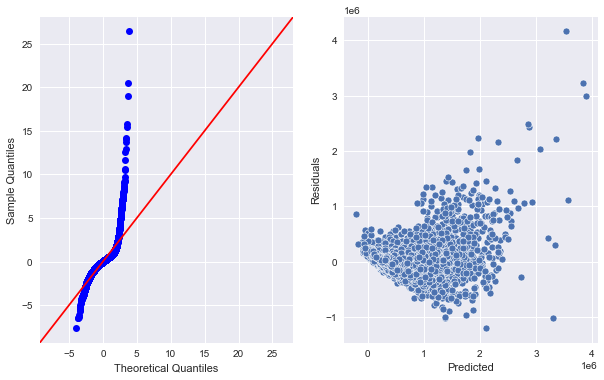

In [68]:
def modeling(df, target="price"):
    features = " + ".join(df.drop(target, axis=1).columns)
    f = target + "~" + features
    model = smf.ols(formula = f, data=df).fit()
    display(model.summary())
    
    fig, ax = plt.subplots(ncols=2, figsize=(10, 6))
    sm.graphics.qqplot(model.resid, line="45", fit=True, ax=ax[0])
    sns.scatterplot(x=model.predict(df, transform=True), y=model.resid, ax=ax[1])
    ax[1].set_ylabel('Residuals')
    ax[1].set_xlabel('Predicted')
    return model

initial_model = modeling(modeling_df)
    

#### Multicollinearity check

In [69]:
df.corr()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,lat,long,sqft_living15,sqft_lot15,large_home,how_old,renovated,has_basement,sqft_living_comparison,price
id,1.000000,0.001150,0.005162,-0.012241,-0.131911,0.019229,-0.003599,0.011772,-0.023803,0.008188,...,-0.001798,0.020672,-0.002701,-0.138557,-0.009057,-0.021617,-0.010621,NaN,-0.004408,-0.016772
bedrooms,0.001150,1.000000,0.514508,0.578212,0.032471,0.158065,-0.002127,0.078354,0.026496,0.356563,...,-0.009951,0.132054,0.393406,0.030690,0.406468,-0.155670,0.017635,NaN,0.365105,0.308787
bathrooms,0.005162,0.514508,1.000000,0.755758,0.088373,0.520922,0.063629,0.186016,-0.126479,0.665838,...,0.024280,0.224903,0.569884,0.088303,0.172900,-0.507173,0.046742,NaN,0.342441,0.525906
sqft_living,-0.012241,0.578212,0.755758,1.000000,0.173453,0.353372,0.104637,0.281715,-0.059445,0.762779,...,0.052155,0.241214,0.756402,0.184342,0.178745,-0.318152,0.050829,NaN,0.470834,0.701917
sqft_lot,-0.131911,0.032471,0.088373,0.173453,1.000000,-0.008603,0.021459,0.075054,-0.008830,0.114731,...,-0.085514,0.230227,0.144763,0.718204,0.008984,-0.052946,0.005091,NaN,0.047754,0.089876
floors,0.019229,0.158065,0.520922,0.353372,-0.008603,1.000000,0.018321,0.023711,-0.293463,0.473273,...,0.029218,0.159481,0.296797,-0.012766,0.023155,-0.578549,-0.009580,NaN,0.109445,0.237264
waterfront,-0.003599,-0.002127,0.063629,0.104637,0.021459,0.018321,1.000000,0.380543,0.016648,0.082818,...,-0.012157,-0.037628,0.083823,0.030658,0.007978,0.024487,0.074267,NaN,0.022118,0.264306
view,0.011772,0.078354,0.186016,0.281715,0.075054,0.023711,0.380543,1.000000,0.045622,0.249082,...,0.006321,-0.077702,0.278928,0.073083,0.044224,0.054452,0.090480,NaN,0.062615,0.393497
condition,-0.023803,0.026496,-0.126479,-0.059445,-0.008830,-0.293463,0.016648,0.045622,1.000000,-0.146896,...,-0.015102,-0.105877,-0.093072,-0.003126,0.011028,0.361592,-0.055383,NaN,0.056044,0.036056
grade,0.008188,0.356563,0.665838,0.762779,0.114731,0.473273,0.082818,0.249082,-0.146896,1.000000,...,0.113575,0.200341,0.713867,0.120981,0.048060,-0.447865,0.015259,NaN,0.213058,0.667951


In [70]:
abs(df.corr()) > 0.75

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,lat,long,sqft_living15,sqft_lot15,large_home,how_old,renovated,has_basement,sqft_living_comparison,price
id,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,True,True,False,False,False,False,False,True,...,False,False,True,False,False,False,False,False,False,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
grade,False,False,False,True,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


(<Figure size 1080x720 with 2 Axes>, <AxesSubplot:>)

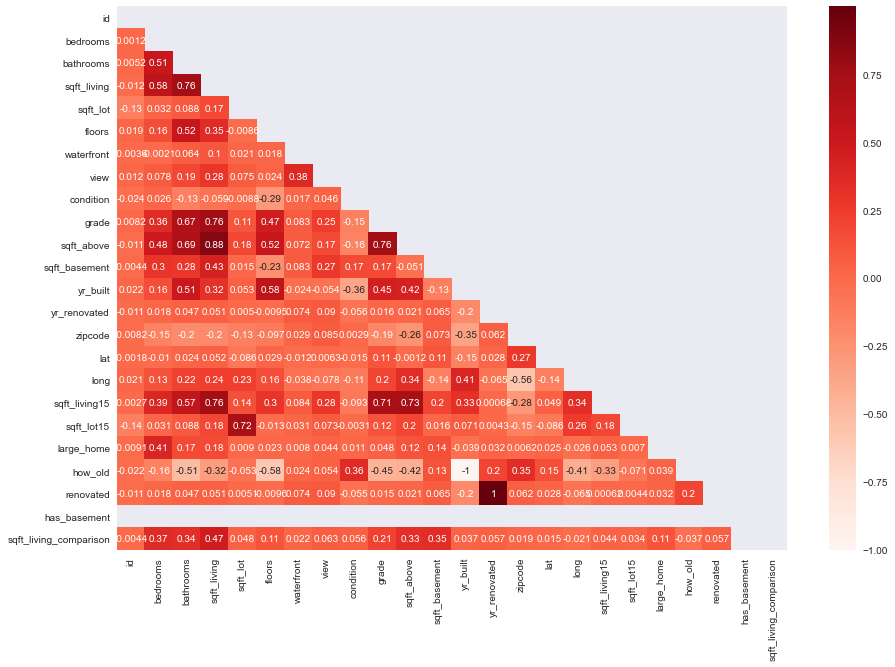

In [71]:
def heatmap(df, figsize=(15, 10), cmap="Reds"):
    corr = df.drop("price", axis=1).corr()
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(corr, annot=True,cmap=cmap, mask=mask)
    return fig, ax

heatmap(df)

In [72]:
## Making a dataframe with all the non-duplicate correlation coefficient
df_corr = df.corr().abs().stack().reset_index().sort_values(0, ascending=False)

df_corr["pairs"] = list(zip(df_corr["level_0"], df_corr["level_1"]))

## Setting index to the new column "pairs" created
df_corr.set_index(["pairs"], inplace=True)

## Dropping the columns "level_1" and "level_0"
df_corr.drop(columns=["level_1", "level_0"], inplace=True)

df_corr.columns = ["cc"]

df_corr[(df_corr["cc"] > 0.75) & (df_corr["cc"] < 1)]


,cc
pairs,
"(renovated, yr_renovated)",0.999968
"(yr_renovated, renovated)",0.999968
"(sqft_living, sqft_above)",0.876448
"(sqft_above, sqft_living)",0.876448
"(sqft_living, grade)",0.762779
"(grade, sqft_living)",0.762779
"(sqft_living, sqft_living15)",0.756402
"(sqft_living15, sqft_living)",0.756402
"(grade, sqft_above)",0.756073


**As we can see yr_renovated and sqft_living are highly correlated variables, we shall drop these columns from our main dataframe to avoid issues while modeling**

In [73]:
modeling_df.drop(["yr_renovated", "sqft_living"], axis=1, inplace=True)

In [74]:
modeling_df

,id,date,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,7129300520,10/13/2014,3,1.00,5650,1,0,0,3,7,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,6414100192,12/9/2014,3,2.25,7242,2,0,0,3,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5631500400,2/25/2015,2,1.00,10000,1,0,0,3,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2487200875,12/9/2014,4,3.00,5000,1,0,0,5,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1954400510,2/18/2015,3,2.00,8080,1,0,0,3,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,3,2.50,1131,3,0,0,3,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21593,6600060120,2/23/2015,4,2.50,5813,2,0,0,3,8,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21594,1523300141,6/23/2014,2,0.75,1350,2,0,0,3,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21595,291310100,1/16/2015,3,2.50,2388,2,0,0,3,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Modeling

### Data Modeling

In [75]:
modeling_df.drop(["id", "date"], axis=1, inplace=True)
modeling_df

,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,3,1.00,5650,1,0,0,3,7,1180,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,3,2.25,7242,2,0,0,3,7,2170,400.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,1.00,10000,1,0,0,3,6,770,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,3.00,5000,1,0,0,5,7,1050,910.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3,2.00,8080,1,0,0,3,8,1680,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,1131,3,0,0,3,8,1530,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21593,4,2.50,5813,2,0,0,3,8,2310,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21594,2,0.75,1350,2,0,0,3,7,1020,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21595,3,2.50,2388,2,0,0,3,8,1600,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     1052.
Date:                Wed, 21 Jul 2021   Prob (F-statistic):               0.00
Time:                        14:10:01   Log-Likelihood:            -2.8947e+05
No. Observations:               21597   AIC:                         5.791e+05
Df Residuals:                   21509   BIC:                         5.798e+05
Df Model:                          87                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                -13.2649      3.023     -4.388      0.000     -19.191      -7.339
has_basement[T.True]     -13.2649      3.023     -4.388      0.000     -19.191      -7.339
bedrooms               -2.538e+04   1652.911    -15.353      0.000   -2.86e+04   -2.21e+04
bathrooms               2.562e+04   2615.763      9.794      0.000    2.05e+04    3.07e+04
sqft_lot                   0.2318      0.038      6.038      0.000       0.157       0.307
floors                 -4.537e+04   3171.977    -14.303      0.000   -5.16e+04   -3.92e+04
waterfront              6.799e+05   1.47e+04     46.261      0.000    6.51e+05    7.09e+05
view                    5.587e+04   1738.934     32.127      0.000    5.25e+04    5.93e+04
condition               2.703e+04   1922.361     14.058      0.000    2.33e+04    3.08e+04
grade                   5.721e+04   1825.131     31.343      0.000    5.36e+04    6.08e+04
sqft_above               231.3114      3.392     68.198      0.000     224.663     237.959
sqft_basement            156.8926      3.912     40.109      0.000     149.226     164.560
yr_built                -1.37e+04   3044.850     -4.500      0.000   -1.97e+04   -7735.033
lat                     1.927e+05   6.34e+04      3.041      0.002    6.85e+04    3.17e+05
long                   -1.468e+05   4.55e+04     -3.224      0.001   -2.36e+05   -5.76e+04
sqft_living15            -11.8021      3.222     -3.663      0.000     -18.117      -5.487
sqft_lot15                -0.1395      0.060     -2.307      0.021      -0.258      -0.021
large_home              7522.8163   9925.425      0.758      0.448   -1.19e+04     2.7e+04
how_old                -1.303e+04   3047.412     -4.274      0.000    -1.9e+04   -7052.505
renovated               4.005e+04   6389.806      6.267      0.000    2.75e+04    5.26e+04
sqft_living_comparison -4.995e+04   3001.981    -16.640      0.000   -5.58e+04   -4.41e+04
zipcode_98002           3.418e+04   1.45e+04      2.363      0.018    5833.506    6.25e+04
zipcode_98003          -2.556e+04   1.29e+04     -1.977      0.048   -5.09e+04    -220.552
zipcode_98004           7.178e+05   2.35e+04     30.550      0.000    6.72e+05    7.64e+05
zipcode_98005           2.532e+05   2.51e+04     10.083      0.000    2.04e+05    3.02e+05
zipcode_98006            2.33e+05   2.05e+04     11.346      0.000    1.93e+05    2.73e+05
zipcode_98007           2.044e+05   2.59e+04      7.885      0.000    1.54e+05    2.55e+05
zipcode_98008           2.096e+05   2.46e+04      8.513      0.000    1.61e+05    2.58e+05
zipcode_98010           1.025e+05    2.2e+04      4.650      0.000    5.93e+04    1.46e+05
zipcode_98011           4.318e+04    3.2e+04      1.349      0.177   -1.96e+04    1.06e+05
zipcode_98014           9.491e+04   3.52e+04      2.698      0.007    2.59e+04  

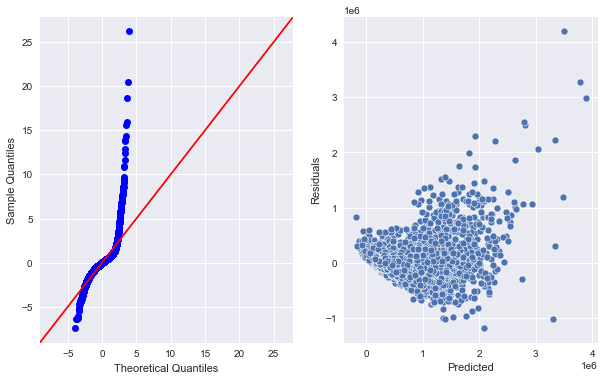

In [76]:
modeling(modeling_df)

The p-value of long, sqft_lot and how_old is greater than our 0.05 alpha level. So we shall drop these columns as they are statistically insignificant.

In [77]:
drop_cols = ["long", "sqft_lot15", "how_old"]
modeling_df.drop(drop_cols, axis=1, inplace=True)
modeling_df

,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,3,1.00,5650,1,0,0,3,7,1180,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,3,2.25,7242,2,0,0,3,7,2170,400.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,1.00,10000,1,0,0,3,6,770,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,3.00,5000,1,0,0,5,7,1050,910.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3,2.00,8080,1,0,0,3,8,1680,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,1131,3,0,0,3,8,1530,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21593,4,2.50,5813,2,0,0,3,8,2310,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21594,2,0.75,1350,2,0,0,3,7,1020,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21595,3,2.50,2388,2,0,0,3,8,1600,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     1076.
Date:                Wed, 21 Jul 2021   Prob (F-statistic):               0.00
Time:                        14:10:02   Log-Likelihood:            -2.8948e+05
No. Observations:               21597   AIC:                         5.791e+05
Df Residuals:                   21511   BIC:                         5.798e+05
Df Model:                          85                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -4.489e+06    1.5e+06     -2.998      0.003   -7.42e+06   -1.55e+06
has_basement[T.True]   -4.489e+06    1.5e+06     -2.998      0.003   -7.42e+06   -1.55e+06
bedrooms               -2.518e+04   1652.317    -15.236      0.000   -2.84e+04   -2.19e+04
bathrooms               2.578e+04   2616.145      9.854      0.000    2.07e+04    3.09e+04
sqft_lot                   0.1675      0.029      5.745      0.000       0.110       0.225
floors                 -4.472e+04   3168.993    -14.111      0.000   -5.09e+04   -3.85e+04
waterfront              6.812e+05   1.47e+04     46.347      0.000    6.52e+05     7.1e+05
view                    5.594e+04   1739.410     32.161      0.000    5.25e+04    5.93e+04
condition               2.696e+04   1922.817     14.020      0.000    2.32e+04    3.07e+04
grade                   5.738e+04   1825.220     31.436      0.000    5.38e+04     6.1e+04
sqft_above               230.6228      3.388     68.061      0.000     223.981     237.264
sqft_basement            156.6780      3.912     40.055      0.000     149.011     164.345
yr_built                -685.7429     66.803    -10.265      0.000    -816.681    -554.805
lat                     2.075e+05   6.32e+04      3.281      0.001    8.36e+04    3.31e+05
sqft_living15            -12.1486      3.218     -3.775      0.000     -18.457      -5.840
large_home              6971.0148   9927.357      0.702      0.483   -1.25e+04    2.64e+04
renovated               3.965e+04   6391.183      6.204      0.000    2.71e+04    5.22e+04
sqft_living_comparison -4.988e+04   3002.882    -16.612      0.000   -5.58e+04    -4.4e+04
zipcode_98002           2.569e+04   1.42e+04      1.806      0.071   -2198.716    5.36e+04
zipcode_98003          -1.997e+04   1.28e+04     -1.558      0.119   -4.51e+04    5153.626
zipcode_98004           7.037e+05   2.31e+04     30.474      0.000    6.58e+05    7.49e+05
zipcode_98005           2.332e+05   2.44e+04      9.566      0.000    1.85e+05    2.81e+05
zipcode_98006           2.112e+05   1.94e+04     10.898      0.000    1.73e+05    2.49e+05
zipcode_98007            1.81e+05   2.49e+04      7.270      0.000    1.32e+05     2.3e+05
zipcode_98008           1.822e+05   2.31e+04      7.882      0.000    1.37e+05    2.28e+05
zipcode_98010            6.01e+04   1.83e+04      3.288      0.001    2.43e+04    9.59e+04
zipcode_98011            2.65e+04   3.16e+04      0.839      0.402   -3.54e+04    8.85e+04
zipcode_98014           2.372e+04   2.85e+04      0.832      0.405   -3.21e+04    7.96e+04
zipcode_98019           -761.8081   3.07e+04     -0.025      0.980   -6.09e+04    5.94e+04
zipcode_98022           1811.9396    1.5e+04      0.121      0.904   -2.75e+04    3.12e+04
zipcode_98023          -3.499e+04   1.11e+04     -3.147      0.002   -5.68e+04  

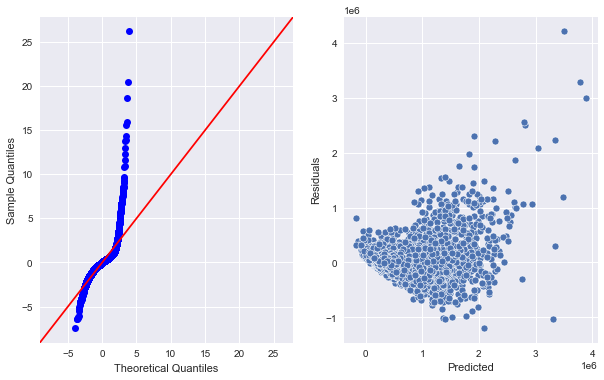

In [78]:
modeling(modeling_df)

### Removing outliers from the Dataset to complete homoscedasticity assumptions

**Here we remove the outliers so that we get a cleaned dataset which meet our homokedasticity assumptions and build from there**

In [79]:
numeric_cols = ['bedrooms','bathrooms','sqft_lot','view','condition','grade',"sqft_basement", "price"]

In [80]:
for col in numeric_cols:
    modeling_df = modeling_df[find_outliers(modeling_df[col]) == False]

modeling_df

,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,3,1.00,5650,1,0,0,3,7,1180,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,3,2.25,7242,2,0,0,3,7,2170,400.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,1.00,10000,1,0,0,3,6,770,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,3.00,5000,1,0,0,5,7,1050,910.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3,2.00,8080,1,0,0,3,8,1680,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,1131,3,0,0,3,8,1530,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21593,4,2.50,5813,2,0,0,3,8,2310,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21594,2,0.75,1350,2,0,0,3,7,1020,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21595,3,2.50,2388,2,0,0,3,8,1600,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


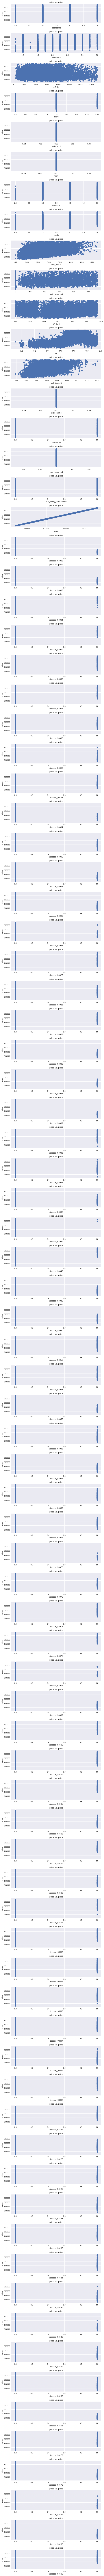

In [81]:
def plot(df, target="price"):
    fig, ax = plt.subplots(nrows=len(df.columns), figsize=(8, 196))
    for i, cols in enumerate(df.columns):
        ax[i].scatter(df[cols], df[target])
        ax[i].set_xlabel(cols)
        ax[i].set_ylabel(target)
        ax[i].set_title(f"{col} vs. {target}")
    plt.tight_layout()
    return plt.show()

plot(modeling_df, target="price")
        

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     879.7
Date:                Wed, 21 Jul 2021   Prob (F-statistic):               0.00
Time:                        14:10:16   Log-Likelihood:            -1.9116e+05
No. Observations:               15188   AIC:                         3.825e+05
Df Residuals:                   15105   BIC:                         3.831e+05
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               9.848e+04   8.78e+05      0.112      0.911   -1.62e+06    1.82e+06
has_basement[T.True]    9.848e+04   8.78e+05      0.112      0.911   -1.62e+06    1.82e+06
bedrooms                -464.3731   1001.368     -0.464      0.643   -2427.175    1498.429
bathrooms               1.312e+04   1541.383      8.515      0.000    1.01e+04    1.61e+04
sqft_lot                   1.1476      0.242      4.752      0.000       0.674       1.621
floors                 -1.798e+04   1829.455     -9.828      0.000   -2.16e+04   -1.44e+04
waterfront             -9.461e-08    5.2e-07     -0.182      0.856   -1.11e-06    9.25e-07
view                   -1.012e-07   9.54e-08     -1.061      0.288   -2.88e-07    8.57e-08
condition               2.104e+04   1046.207     20.115      0.000     1.9e+04    2.31e+04
grade                   3.857e+04   1168.686     33.003      0.000    3.63e+04    4.09e+04
sqft_above               111.1577      2.459     45.201      0.000     106.337     115.978
sqft_basement             71.5220      2.903     24.638      0.000      65.832      77.212
yr_built                -392.8884     37.678    -10.427      0.000    -466.742    -319.034
lat                     4953.7700   3.71e+04      0.134      0.894   -6.77e+04    7.76e+04
sqft_living15             31.2297      2.227     14.020      0.000      26.864      35.596
large_home               8.59e-09   4.38e-08      0.196      0.844   -7.73e-08    9.44e-08
renovated               2.777e+04   3878.876      7.159      0.000    2.02e+04    3.54e+04
sqft_living_comparison -1237.1965   1676.121     -0.738      0.460   -4522.596    2048.203
zipcode_98002           7901.6988   6873.541      1.150      0.250   -5571.274    2.14e+04
zipcode_98003           4018.3746   6309.958      0.637      0.524   -8349.907    1.64e+04
zipcode_98004           4.834e+05   1.42e+04     34.133      0.000    4.56e+05    5.11e+05
zipcode_98005           3.151e+05   1.38e+04     22.865      0.000    2.88e+05    3.42e+05
zipcode_98006           2.547e+05   1.11e+04     22.862      0.000    2.33e+05    2.77e+05
zipcode_98007           2.457e+05   1.37e+04     17.882      0.000    2.19e+05    2.73e+05
zipcode_98008            2.33e+05   1.31e+04     17.787      0.000    2.07e+05    2.59e+05
zipcode_98010           7.322e+04   1.21e+04      6.028      0.000    4.94e+04     9.7e+04
zipcode_98011           1.511e+05   1.79e+04      8.454      0.000    1.16e+05    1.86e+05
zipcode_98014           9.916e+04   1.82e+04      5.459      0.000    6.36e+04    1.35e+05
zipcode_98019           9.573e+04   1.74e+04      5.489      0.000    6.15e+04     1.3e+05
zipcode_98022            1.09e+04   8646.513      1.260      0.208   -6051.033    2.78e+04
zipcode_98023          -1.329e+04   5448.125     -2.439      0.015    -2.4e+04  

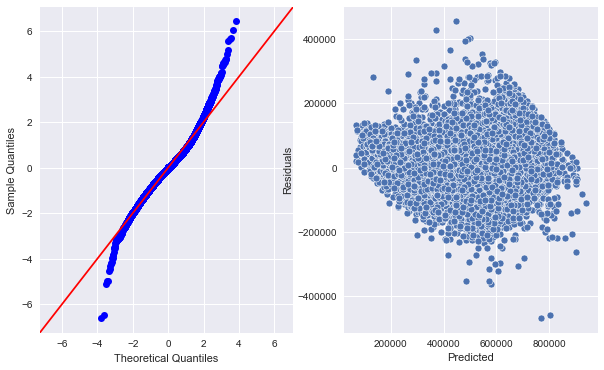

In [82]:
model = modeling(modeling_df)

In [83]:
model.pvalues[model.pvalues > 0.05]

Intercept                 0.910653
has_basement[T.True]      0.910653
bedrooms                  0.642842
waterfront                0.855667
view                      0.288499
lat                       0.893682
large_home                0.844495
sqft_living_comparison    0.460446
zipcode_98002             0.250334
zipcode_98003             0.524245
zipcode_98022             0.207582
zipcode_98030             0.241626
zipcode_98031             0.060239
zipcode_98032             0.984908
zipcode_98042             0.069229
dtype: float64

from p values, we can see floors and lat are insignificant, hence we can get rid of them.

In [84]:
modeling_df.drop(["floors", "lat"], axis=1, inplace=True)

In [85]:
modeling_df

,bedrooms,bathrooms,sqft_lot,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,3,1.00,5650,0,0,3,7,1180,0.0,1955,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,3,2.25,7242,0,0,3,7,2170,400.0,1951,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,1.00,10000,0,0,3,6,770,0.0,1933,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,3.00,5000,0,0,5,7,1050,910.0,1965,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3,2.00,8080,0,0,3,8,1680,0.0,1987,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,1131,0,0,3,8,1530,0.0,2009,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21593,4,2.50,5813,0,0,3,8,2310,0.0,2014,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21594,2,0.75,1350,0,0,3,7,1020,0.0,2009,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21595,3,2.50,2388,0,0,3,8,1600,0.0,2004,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     894.9
Date:                Wed, 21 Jul 2021   Prob (F-statistic):               0.00
Time:                        14:10:16   Log-Likelihood:            -1.9121e+05
No. Observations:               15188   AIC:                         3.826e+05
Df Residuals:                   15107   BIC:                         3.832e+05
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               3.524e+05    3.4e+04     10.369      0.000    2.86e+05    4.19e+05
has_basement[T.True]    3.524e+05    3.4e+04     10.369      0.000    2.86e+05    4.19e+05
bedrooms                 162.4404   1002.458      0.162      0.871   -1802.499    2127.380
bathrooms               9646.2128   1504.918      6.410      0.000    6696.392    1.26e+04
sqft_lot                   1.6841      0.236      7.136      0.000       1.221       2.147
waterfront             -1.947e-06   2.46e-07     -7.920      0.000   -2.43e-06   -1.46e-06
view                   -2.062e-06   2.86e-07     -7.220      0.000   -2.62e-06    -1.5e-06
condition               2.142e+04   1048.640     20.424      0.000    1.94e+04    2.35e+04
grade                   3.818e+04   1171.363     32.596      0.000    3.59e+04    4.05e+04
sqft_above               106.3454      2.418     43.990      0.000     101.607     111.084
sqft_basement             77.3741      2.850     27.150      0.000      71.788      82.960
yr_built                -540.7141     34.655    -15.603      0.000    -608.642    -472.786
sqft_living15             32.8231      2.228     14.729      0.000      28.455      37.191
large_home             -9.129e-10   2.56e-11    -35.720      0.000   -9.63e-10   -8.63e-10
renovated               2.524e+04   3882.251      6.502      0.000    1.76e+04    3.29e+04
sqft_living_comparison -1179.8369   1681.190     -0.702      0.483   -4475.172    2115.498
zipcode_98002           8272.2043   6894.915      1.200      0.230   -5242.663    2.18e+04
zipcode_98003           4780.0469   6328.713      0.755      0.450   -7624.996    1.72e+04
zipcode_98004           4.826e+05   8676.351     55.624      0.000    4.66e+05       5e+05
zipcode_98005           3.177e+05   8645.914     36.750      0.000    3.01e+05    3.35e+05
zipcode_98006           2.548e+05   6322.337     40.302      0.000    2.42e+05    2.67e+05
zipcode_98007           2.463e+05   8170.539     30.143      0.000     2.3e+05    2.62e+05
zipcode_98008            2.36e+05   6568.397     35.933      0.000    2.23e+05    2.49e+05
zipcode_98010           7.209e+04   1.22e+04      5.922      0.000    4.82e+04     9.6e+04
zipcode_98011           1.533e+05   7030.715     21.801      0.000    1.39e+05    1.67e+05
zipcode_98014           1.004e+05   1.21e+04      8.326      0.000    7.67e+04    1.24e+05
zipcode_98019           9.628e+04   7480.810     12.870      0.000    8.16e+04    1.11e+05
zipcode_98022           1.165e+04   7687.625      1.515      0.130   -3418.280    2.67e+04
zipcode_98023           -1.22e+04   5462.112     -2.233      0.026   -2.29e+04   -1493.063
zipcode_98024           1.274e+05   1.52e+04      8.402      0.000    9.77e+04    1.57e+05
zipcode_98027           2.331e+05   6616.191     35.227      0.000     2.2e+05  

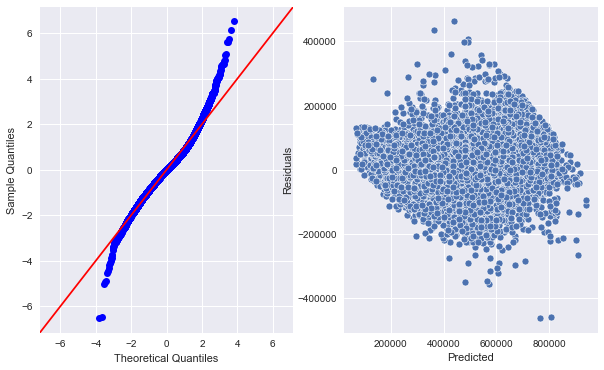

In [86]:
model = modeling(modeling_df)

In [87]:
modeling_df.drop(["large_home","renovated", "bedrooms"], axis=1, inplace=True)

dropping large_home and renovated from the dataset since they are insignificant

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     914.9
Date:                Wed, 21 Jul 2021   Prob (F-statistic):               0.00
Time:                        14:10:17   Log-Likelihood:            -1.9123e+05
No. Observations:               15188   AIC:                         3.826e+05
Df Residuals:                   15109   BIC:                         3.832e+05
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                4.08e+05   3.27e+04     12.462      0.000    3.44e+05    4.72e+05
has_basement[T.True]     4.08e+05   3.27e+04     12.462      0.000    3.44e+05    4.72e+05
bathrooms               1.084e+04   1477.641      7.339      0.000    7948.110    1.37e+04
sqft_lot                   1.6593      0.236      7.028      0.000       1.196       2.122
waterfront              1.032e-06   9.47e-08     10.889      0.000    8.46e-07    1.22e-06
view                   -2.226e-06   2.55e-07     -8.716      0.000   -2.73e-06   -1.73e-06
condition                2.04e+04   1037.927     19.652      0.000    1.84e+04    2.24e+04
grade                   3.856e+04   1167.170     33.034      0.000    3.63e+04    4.08e+04
sqft_above               106.6574      2.317     46.041      0.000     102.117     111.198
sqft_basement             77.3044      2.771     27.901      0.000      71.874      82.735
yr_built                -596.5985     33.525    -17.796      0.000    -662.311    -530.886
sqft_living15             31.9725      2.228     14.353      0.000      27.606      36.339
sqft_living_comparison -1194.7860   1682.119     -0.710      0.478   -4491.942    2102.370
zipcode_98002           8348.3061   6904.084      1.209      0.227   -5184.535    2.19e+04
zipcode_98003           4293.0498   6335.970      0.678      0.498   -8126.218    1.67e+04
zipcode_98004            4.83e+05   8687.345     55.594      0.000    4.66e+05       5e+05
zipcode_98005           3.175e+05   8656.860     36.673      0.000    3.01e+05    3.34e+05
zipcode_98006           2.549e+05   6330.700     40.266      0.000    2.43e+05    2.67e+05
zipcode_98007            2.46e+05   8180.160     30.077      0.000     2.3e+05    2.62e+05
zipcode_98008           2.356e+05   6574.909     35.839      0.000    2.23e+05    2.49e+05
zipcode_98010           7.398e+04   1.22e+04      6.071      0.000    5.01e+04    9.79e+04
zipcode_98011           1.533e+05   7038.432     21.779      0.000    1.39e+05    1.67e+05
zipcode_98014           1.007e+05   1.21e+04      8.345      0.000    7.71e+04    1.24e+05
zipcode_98019           9.654e+04   7488.853     12.891      0.000    8.19e+04    1.11e+05
zipcode_98022            1.34e+04   7691.576      1.742      0.082   -1678.687    2.85e+04
zipcode_98023           -1.25e+04   5468.971     -2.287      0.022   -2.32e+04   -1785.152
zipcode_98024           1.279e+05   1.52e+04      8.429      0.000    9.82e+04    1.58e+05
zipcode_98027           2.326e+05   6622.421     35.123      0.000     2.2e+05    2.46e+05
zipcode_98028           1.343e+05   6414.381     20.945      0.000    1.22e+05    1.47e+05
zipcode_98029            2.35e+05   6166.105     38.116      0.000    2.23e+05    2.47e+05
zipcode_98030           8555.6301   6339.319      1.350      0.177   -3870.202  

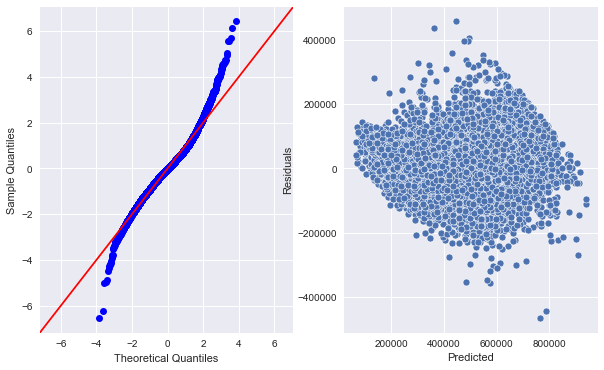

In [88]:
model = modeling(modeling_df)

In [89]:
modeling_df

,bathrooms,sqft_lot,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,1.00,5650,0,0,3,7,1180,0.0,1955,1340,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2.25,7242,0,0,3,7,2170,400.0,1951,1690,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.00,10000,0,0,3,6,770,0.0,1933,2720,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.00,5000,0,0,5,7,1050,910.0,1965,1360,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.00,8080,0,0,3,8,1680,0.0,1987,1800,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2.50,1131,0,0,3,8,1530,0.0,2009,1530,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21593,2.50,5813,0,0,3,8,2310,0.0,2014,1830,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21594,0.75,1350,0,0,3,7,1020,0.0,2009,1020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21595,2.50,2388,0,0,3,8,1600,0.0,2004,1410,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Outliers based on price

In [90]:
outliers_price = modeling_df[find_outliers(modeling_df["price"]) == False]

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     905.0
Date:                Wed, 21 Jul 2021   Prob (F-statistic):               0.00
Time:                        14:10:18   Log-Likelihood:            -1.9018e+05
No. Observations:               15121   AIC:                         3.805e+05
Df Residuals:                   15042   BIC:                         3.811e+05
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               3.967e+05   3.24e+04     12.231      0.000    3.33e+05     4.6e+05
has_basement[T.True]    3.967e+05   3.24e+04     12.231      0.000    3.33e+05     4.6e+05
bathrooms               1.062e+04   1463.538      7.254      0.000    7747.802    1.35e+04
sqft_lot                   1.6603      0.233      7.113      0.000       1.203       2.118
waterfront              -7.11e-08   5.91e-09    -12.031      0.000   -8.27e-08   -5.95e-08
view                   -9.585e-08   9.85e-09     -9.730      0.000   -1.15e-07   -7.65e-08
condition                2.05e+04   1026.508     19.971      0.000    1.85e+04    2.25e+04
grade                   3.822e+04   1154.860     33.093      0.000     3.6e+04    4.05e+04
sqft_above               104.1935      2.303     45.245      0.000      99.680     108.707
sqft_basement             75.1218      2.753     27.285      0.000      69.725      80.518
yr_built                -582.5885     33.215    -17.540      0.000    -647.694    -517.483
sqft_living15             32.8610      2.216     14.828      0.000      28.517      37.205
sqft_living_comparison  -624.3401   1665.937     -0.375      0.708   -3889.780    2641.100
zipcode_98002           7994.7105   6811.726      1.174      0.241   -5357.101    2.13e+04
zipcode_98003           4200.0105   6251.008      0.672      0.502   -8052.726    1.65e+04
zipcode_98004           4.681e+05   8881.500     52.708      0.000    4.51e+05    4.86e+05
zipcode_98005           3.167e+05   8575.547     36.931      0.000       3e+05    3.34e+05
zipcode_98006           2.526e+05   6272.361     40.272      0.000     2.4e+05    2.65e+05
zipcode_98007           2.445e+05   8098.144     30.196      0.000    2.29e+05     2.6e+05
zipcode_98008           2.358e+05   6486.985     36.349      0.000    2.23e+05    2.49e+05
zipcode_98010           7.353e+04    1.2e+04      6.116      0.000       5e+04    9.71e+04
zipcode_98011           1.539e+05   6944.199     22.161      0.000     1.4e+05    1.68e+05
zipcode_98014           1.001e+05   1.19e+04      8.406      0.000    7.68e+04    1.23e+05
zipcode_98019             9.7e+04   7388.547     13.128      0.000    8.25e+04    1.11e+05
zipcode_98022           1.307e+04   7588.506      1.722      0.085   -1804.941    2.79e+04
zipcode_98023          -1.243e+04   5395.658     -2.304      0.021    -2.3e+04   -1856.251
zipcode_98024            1.28e+05    1.5e+04      8.546      0.000    9.86e+04    1.57e+05
zipcode_98027           2.314e+05   6552.897     35.314      0.000    2.19e+05    2.44e+05
zipcode_98028           1.347e+05   6328.444     21.280      0.000    1.22e+05    1.47e+05
zipcode_98029           2.357e+05   6083.885     38.739      0.000    2.24e+05    2.48e+05
zipcode_98030           8694.6676   6254.276      1.390      0.164   -3564.475  

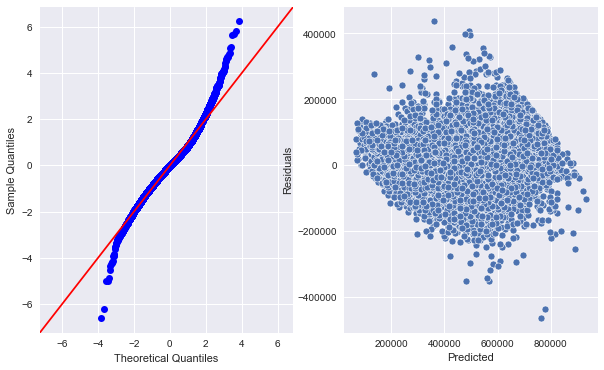

In [91]:
modeling(outliers_price)

In [92]:
outliers_price.drop(["sqft_living_comparison"], axis=1, inplace=True)

C:\Users\Vinayak Modgil\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [93]:
outliers_price["has_basement"].value_counts()

True    15121
Name: has_basement, dtype: int64

### Scaling

In [94]:
cols_numeric = [col for col in outliers_price.columns if (col.startswith('zipcode')==False) & (col.startswith('has')==False) & (col!='price')]
cols_numeric

['bathrooms',
 'sqft_lot',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'sqft_living15']

In [95]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = outliers_price.copy()
df_scaled[cols_numeric] = scaler.fit_transform(df_scaled[cols_numeric])

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     916.8
Date:                Wed, 21 Jul 2021   Prob (F-statistic):               0.00
Time:                        14:10:19   Log-Likelihood:            -1.9018e+05
No. Observations:               15121   AIC:                         3.805e+05
Df Residuals:                   15043   BIC:                         3.811e+05
Df Model:                          77                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -3.714e+14   1.62e+16     -0.023      0.982   -3.21e+16    3.14e+16
has_basement[T.True]  3.714e+14   1.62e+16      0.023      0.982   -3.14e+16    3.21e+16
bathrooms             6850.6518    944.819      7.251      0.000    4998.692    8702.611
sqft_lot              5652.9942    795.054      7.110      0.000    4094.592    7211.396
waterfront              -0.0510      2.224     -0.023      0.982      -4.410       4.308
view                     0.0656      2.859      0.023      0.982      -5.539       5.670
condition             1.305e+04    653.646     19.969      0.000    1.18e+04    1.43e+04
grade                 3.052e+04    919.663     33.187      0.000    2.87e+04    3.23e+04
sqft_above            6.312e+04   1110.340     56.852      0.000    6.09e+04    6.53e+04
sqft_basement         2.379e+04    731.665     32.512      0.000    2.24e+04    2.52e+04
yr_built             -1.721e+04    981.084    -17.541      0.000   -1.91e+04   -1.53e+04
sqft_living15           1.7e+04    962.067     17.666      0.000    1.51e+04    1.89e+04
zipcode_98002         8019.2137   6811.224      1.177      0.239   -5331.614    2.14e+04
zipcode_98003         4219.0138   6250.631      0.675      0.500   -8032.983    1.65e+04
zipcode_98004         4.681e+05   8881.193     52.709      0.000    4.51e+05    4.86e+05
zipcode_98005         3.167e+05   8574.360     36.942      0.000       3e+05    3.34e+05
zipcode_98006         2.526e+05   6271.285     40.285      0.000     2.4e+05    2.65e+05
zipcode_98007         2.445e+05   8097.868     30.196      0.000    2.29e+05     2.6e+05
zipcode_98008         2.358e+05   6486.216     36.359      0.000    2.23e+05    2.49e+05
zipcode_98010         7.355e+04    1.2e+04      6.118      0.000       5e+04    9.71e+04
zipcode_98011         1.539e+05   6943.022     22.172      0.000     1.4e+05    1.68e+05
zipcode_98014         1.001e+05   1.19e+04      8.404      0.000    7.67e+04    1.23e+05
zipcode_98019         9.702e+04   7388.136     13.132      0.000    8.25e+04    1.11e+05
zipcode_98022         1.308e+04   7588.202      1.724      0.085   -1790.182     2.8e+04
zipcode_98023         -1.24e+04   5394.893     -2.299      0.022    -2.3e+04   -1827.164
zipcode_98024          1.28e+05    1.5e+04      8.546      0.000    9.86e+04    1.57e+05
zipcode_98027         2.315e+05   6551.565     35.329      0.000    2.19e+05    2.44e+05
zipcode_98028         1.347e+05   6328.195     21.282      0.000    1.22e+05    1.47e+05
zipcode_98029         2.357e+05   6083.240     38.747      0.000    2.24e+05    2.48e+05
zipcode_98030         8696.1691   6254.101      1.390      0.164   -3562.630     2.1e+04
zipcode_98031         1.374e+04   6164.729      2.230      0.026    1661.312    2.58e+04
zipcode_98032         -926.4820   8200.876     -0.113    

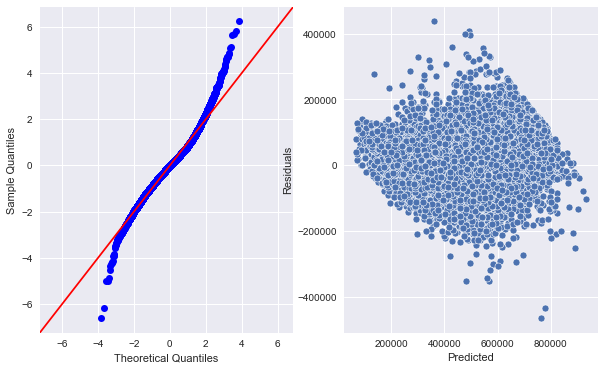

In [96]:
model = modeling(df_scaled)

In [97]:
df_scaled.drop(["waterfront", "has_basement"], axis=1, inplace=True)

## Interpret

**Finally, from our best working model, we shall sort the values to find which features impact the pricing of the houses.**

In [98]:
coefficients = model.params.sort_values().to_frame('coefficients')
coefficients['abs'] = coefficients['coefficients'].abs()
coefficients.sort_values('abs', ascending=False, inplace=True)

In [99]:
coefficients[~coefficients.index.str.startswith('zipcode')]

,coefficients,abs
has_basement[T.True],3.713523e+14,3.713523e+14
Intercept,-3.713523e+14,3.713523e+14
sqft_above,6.312481e+04,6.312481e+04
grade,3.052119e+04,3.052119e+04
sqft_basement,2.378814e+04,2.378814e+04
yr_built,-1.720886e+04,1.720886e+04
sqft_living15,1.699563e+04,1.699563e+04
condition,1.305251e+04,1.305251e+04
bathrooms,6.850652e+03,6.850652e+03
sqft_lot,5.652994e+03,5.652994e+03


**We see that the top 3 parameters that affect the sale price of homes are has_basement, sqft_above and grade.
We shall draw conclusions from the these three parameters.**

In [100]:
sqft_above_df = outliers_price.loc[:, ["sqft_above", "price"]]
sqft_above_df = sqft_above_df.groupby("sqft_above").mean().reset_index()
sqft_above_df

,sqft_above,price
0,480,119900.0
1,490,280300.0
2,560,249900.0
3,570,230000.0
4,580,279475.0
...,...,...
653,4073,510000.0
654,4140,720000.0
655,4180,673200.0
656,4190,460000.0


In [101]:
sqft_above_df["sqft_above"].max()

4210

In [102]:
sqft_above_df["sqft_above"].min()

480

### Data Visualization

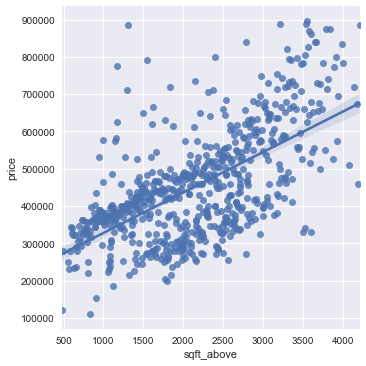

In [103]:
sns.lmplot(x="sqft_above", y="price", data=sqft_above_df)

In [104]:
def types_of_houses(feature):
    if feature > 0 and feature < 1000:
        return "0-1000 sqft"
    elif feature > 1000 and feature < 2000:
        return "1000-2000 sqft"
    elif feature > 2000 and feature < 3000:
        return "2000-3000 sqft"
    elif feature > 3000 and feature < 4000:
        return "3000-4000 sqft"
    elif feature > 4000 and feature < 5000:
        return "4000-5000 sqft"
    else:
        return "5000-6000 sqft"

In [105]:
sqft_above_df["category"] = sqft_above_df["sqft_above"].map(lambda x: types_of_houses(x))

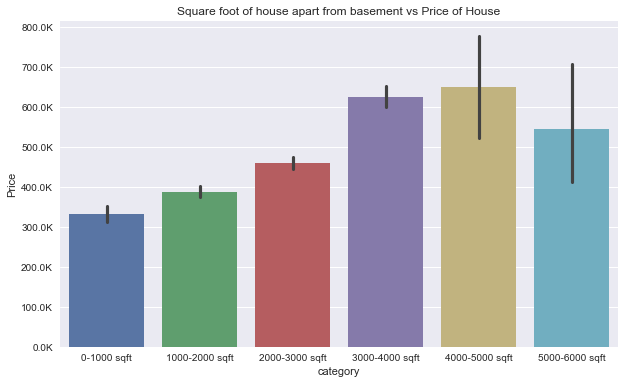

In [106]:
fig, ax = plt.subplots(figsize=(10, 6))
order = ["0-1000 sqft", "1000-2000 sqft", "2000-3000 sqft", "3000-4000 sqft", "4000-5000 sqft", "5000-6000 sqft"]
sns.barplot(x="category", y="price", data=sqft_above_df, order=order, ci=95, ax=ax)
ax.set_label("SQFT above ground")
ax.set_ylabel("Price")
ax.set_title("Square foot of house apart from basement vs Price of House")
ax.yaxis.set_major_formatter(FuncFormatter(thousands))
plt.show()

In [107]:
mean_price_per_category = sqft_above_df.groupby("category")["price"].mean().reset_index()
mean_price_per_category

,category,price
0,0-1000 sqft,331466.561171
1,1000-2000 sqft,387755.069363
2,2000-3000 sqft,458789.411111
3,3000-4000 sqft,624586.888098
4,4000-5000 sqft,649588.800000
5,5000-6000 sqft,545343.019294


In [108]:
outliers_price["has_basement"] = outliers_price["has_basement"].astype("bool")

<ipython-input-108-31a9642a2216>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_price["has_basement"] = outliers_price["has_basement"].astype("bool")


<Figure size 1080x576 with 0 Axes>

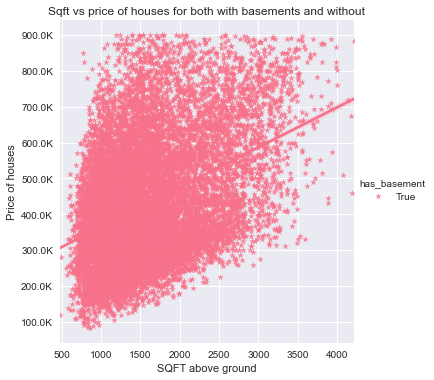

In [109]:
plt.figure(figsize=(15, 8))
sns.lmplot(x="sqft_above", y="price", hue="has_basement", data=outliers_price,
           markers="*", palette="husl")
ax = plt.gca()
ax.set_xlabel("SQFT above ground")
ax.set_ylabel("Price of houses")
ax.set_title("Sqft vs price of houses for both with basements and without")
ax.yaxis.set_major_formatter(FuncFormatter(thousands))

In [110]:
df_grade = outliers_price.loc[:, ["grade", "price"]]
df_grade

,grade,price
0,7,221900.0
1,7,538000.0
2,6,180000.0
3,7,604000.0
4,8,510000.0
...,...,...
21592,8,360000.0
21593,8,400000.0
21594,7,402101.0
21595,8,400000.0


In [111]:
df_grade_sqft = pd.concat([df_grade, outliers_price["sqft_above"]], axis=1)
df_grade_sqft

,grade,price,sqft_above
0,7,221900.0,1180
1,7,538000.0,2170
2,6,180000.0,770
3,7,604000.0,1050
4,8,510000.0,1680
...,...,...,...
21592,8,360000.0,1530
21593,8,400000.0,2310
21594,7,402101.0,1020
21595,8,400000.0,1600


In [112]:
def grade_score(feature):
    if feature < 7:
        return "Low Score"
    elif feature > 8: 
        return "High Score"
    else:
        return "Average Score"

In [113]:
df_grade_sqft["categories"] = df_grade_sqft["grade"].map(lambda x: grade_score(x))

In [114]:
df_grade_group = df_grade_sqft.groupby("categories")["price"].mean().reset_index()
df_grade_group

,categories,price
0,Average Score,425442.880252
1,High Score,632470.022140
2,Low Score,292656.627030


Text(0.5, 1.0, 'Grade vs Price of houses in KC')

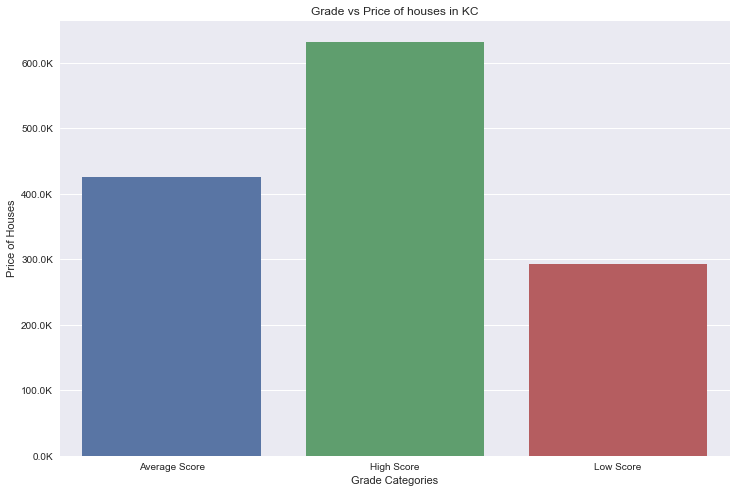

In [115]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x="categories", y="price", data=df_grade_group, ax=ax)
ax.yaxis.set_major_formatter(FuncFormatter(thousands))
ax.set_xlabel("Grade Categories")
ax.set_ylabel("Price of Houses")
ax.set_title("Grade vs Price of houses in KC")

<Figure size 1080x576 with 0 Axes>

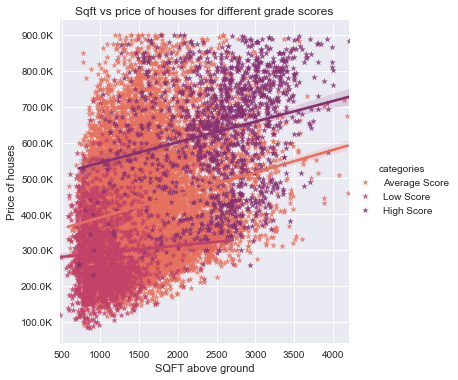

In [116]:
plt.figure(figsize=(15, 8))
sns.lmplot(x="sqft_above", y="price", hue="categories", data= df_grade_sqft,
           markers="*", palette = "flare")
ax = plt.gca()
ax.set_xlabel("SQFT above ground")
ax.set_ylabel("Price of houses")
ax.set_title("Sqft vs price of houses for different grade scores")
ax.yaxis.set_major_formatter(FuncFormatter(thousands))

## Conclusion and Recommendation

***
### The following conclusions can be drawn from our analysis:
- The area above the basement is key when purchasing houses. The main area to focus is on purchasing houses with adequate amount of area excluding the basement.
- Basements also do play a key role in valuing houses in King County. If a house has a basement, it tends to have more value.
- Grading done according to the KC grading system plays a significant role in valuing houses in KC.
***

### Here are the recommendations based on our findings:
***
>- Firstly, we recommend purchasing houses with 4000-5000 sqft area above basement.
>- Secondly, purchasing houses with 4000-5000 sqft and having a basement will be expensive.
>- Lastly, Highly scored houses (according to KC grading system) but not the largest (in terms of sqft above ground) will have a high value.
***